In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import plot_confusion_matrix
import warnings

In [70]:
sklearn.set_config(display='diagram')
plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 140
warnings.filterwarnings('ignore')

# 0.0 Loading Data

In [3]:
file_path = 'https://raw.githubusercontent.com/a-milenkin/Datasetes_for_Piplines/main/responses.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


# 0.1 General EDA

In [5]:
interesting_features = ["Happiness in life", "Age", "Height", "Gender", "Weight",
                        "Left - right handed", "Village - town", "Getting up", "God",
                        "Health", "Borrowed stuff", "Self-criticism", "Elections",
                        "Smoking", "Alcohol" ,"Number of friends", "Spending on healthy eating",
                        "Music", "Movies", "Friends versus money", "Changing the past"]


target = ["Happiness in life"]

In [6]:
data = data[interesting_features]

In [7]:
data.shape

(1010, 21)

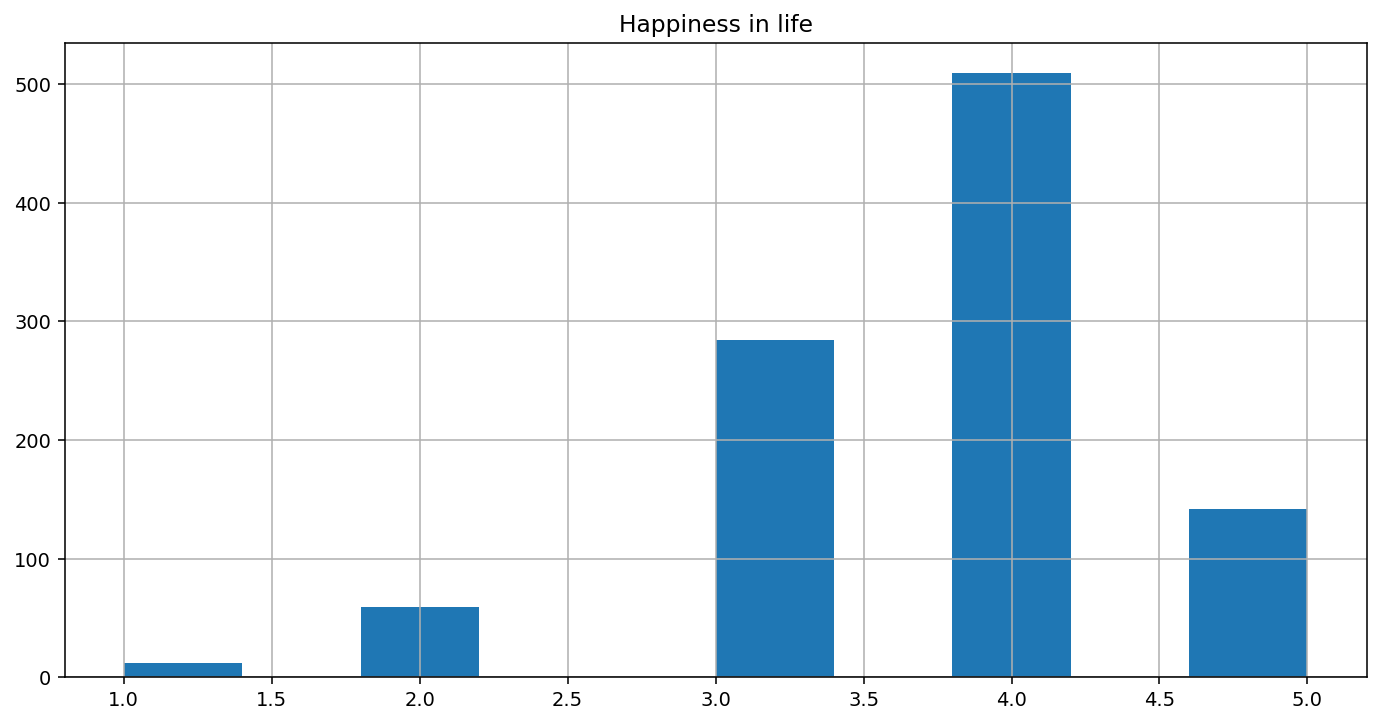

In [8]:
data[target].hist(figsize=(12, 6))
plt.show()

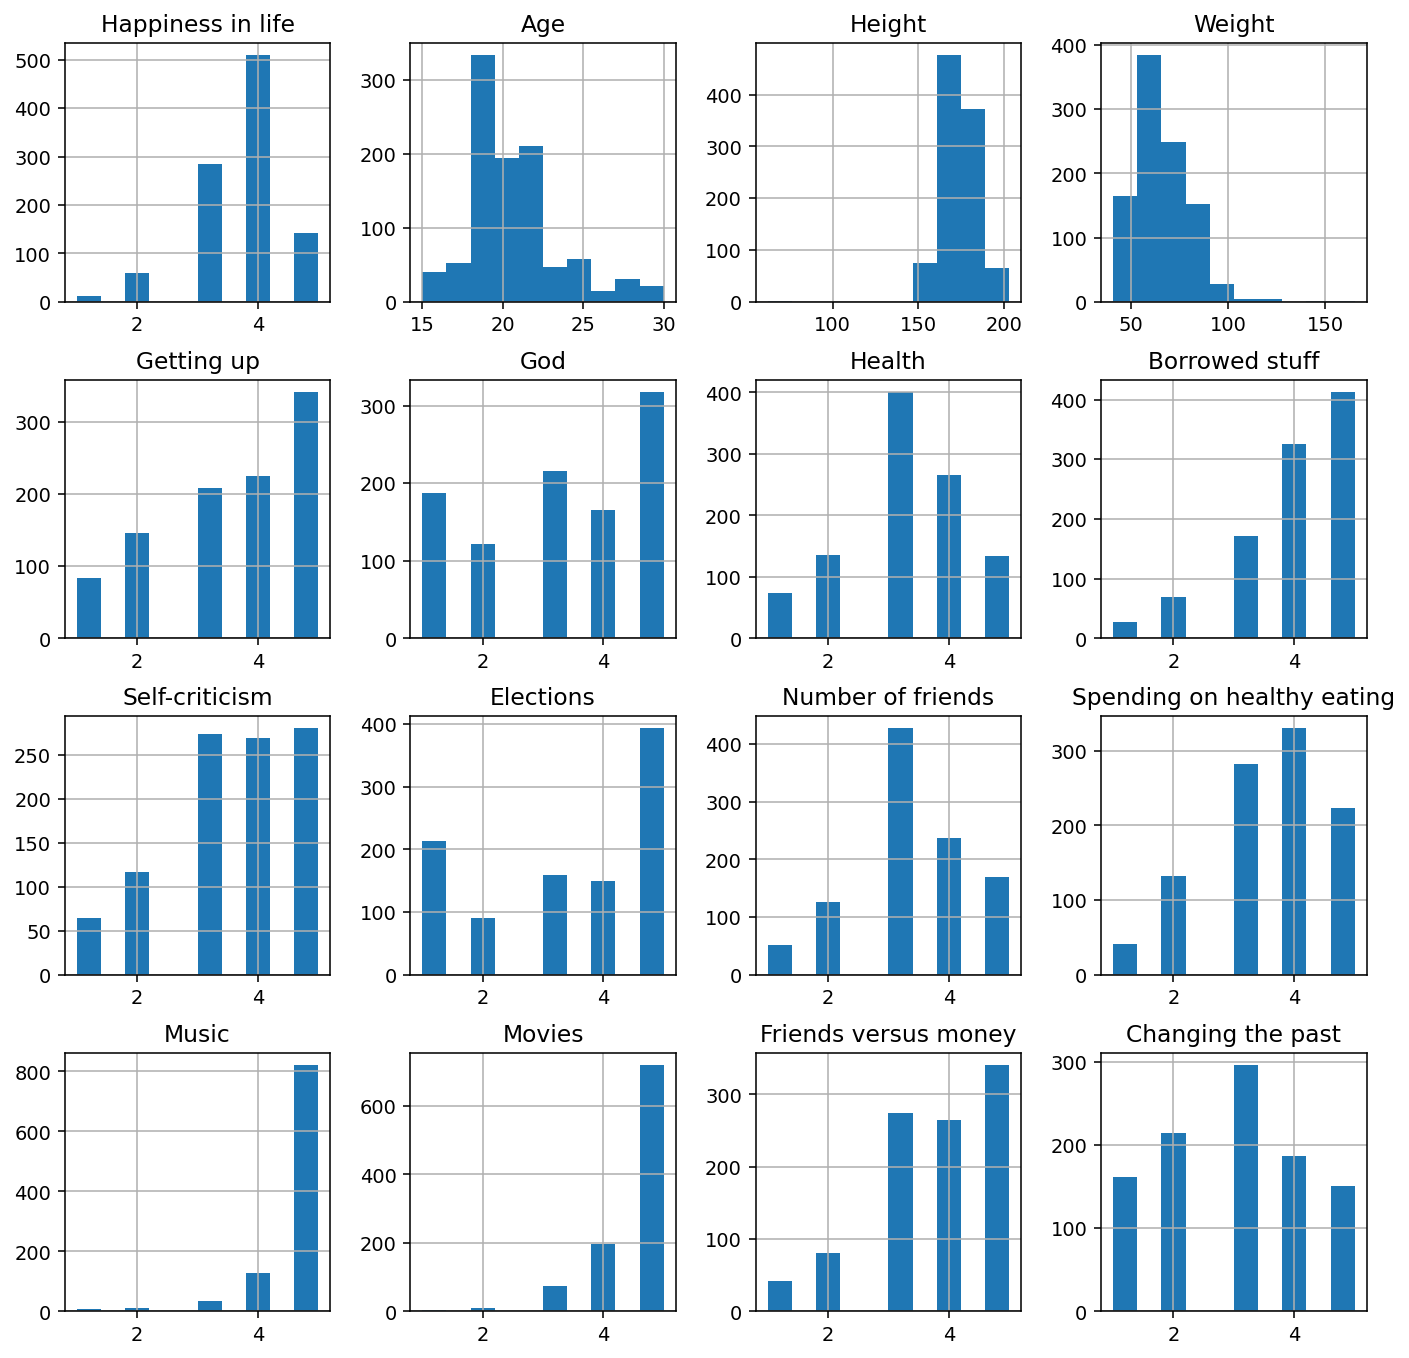

In [9]:
data.hist(figsize=(12, 12))
plt.show()

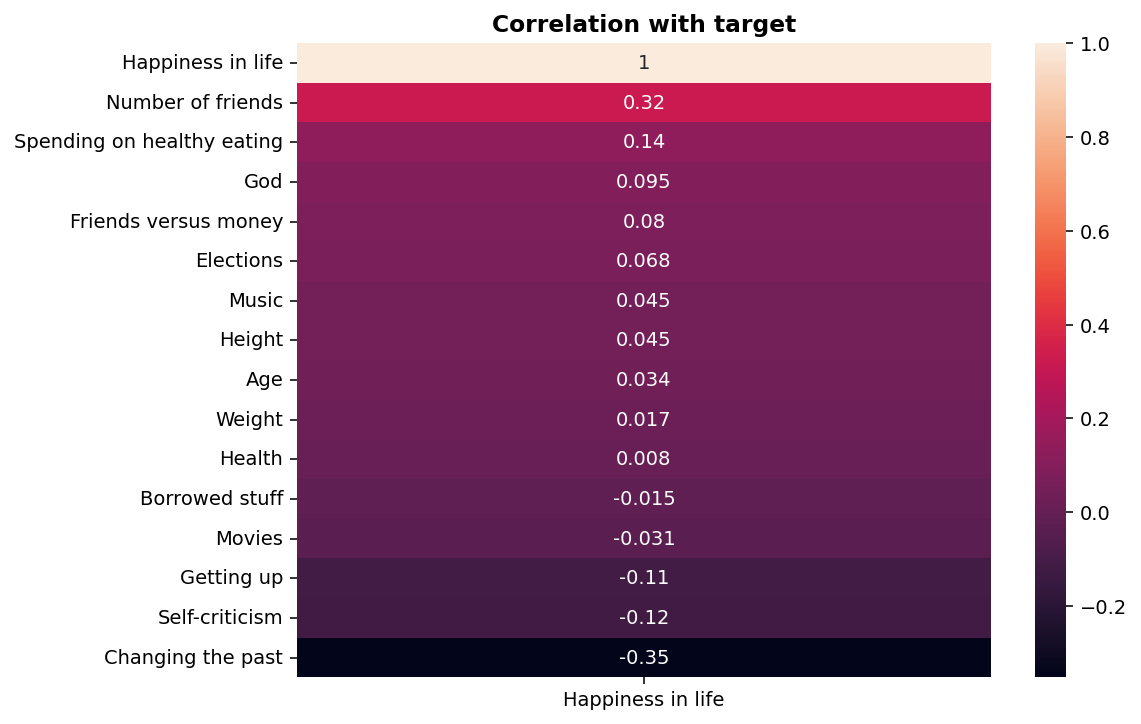

In [10]:
corr = data.corr()

target_corr = corr[target].sort_values(by=target, ascending=False)

sns.heatmap(target_corr, annot=True)
plt.title(f'Correlation with target', fontweight='bold')
plt.show()

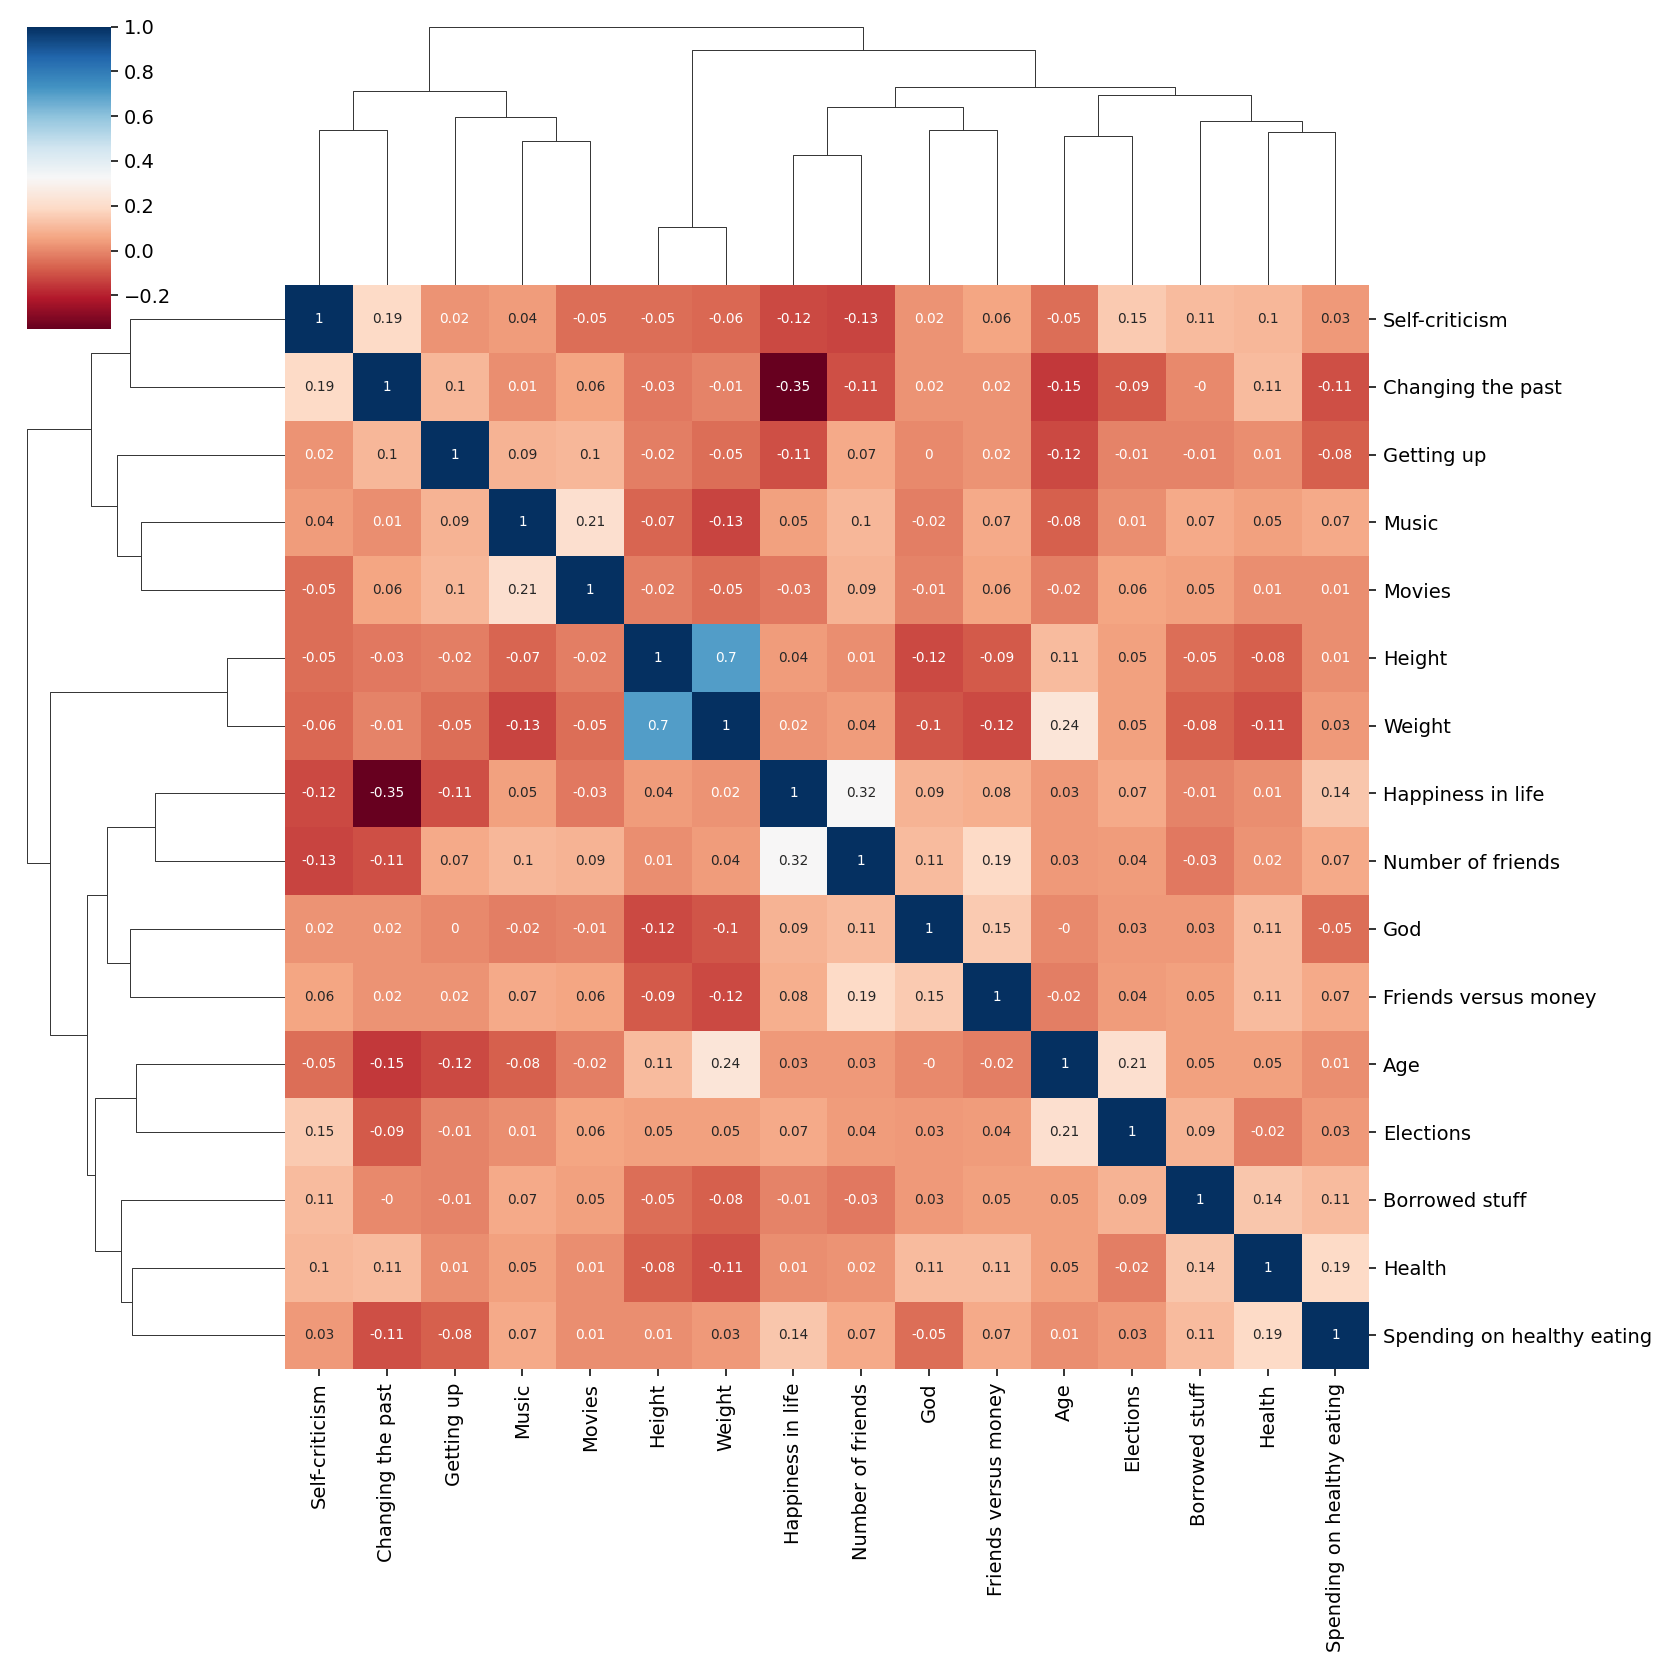

In [11]:
sns.clustermap(round(corr, 2), method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, figsize=(12,12));

# 1. Basic Approach
### Solving Classification task withou pipline

## 1.1 Check number of NaNs & Drop

In [89]:
data.isnull().sum().sort_values()

data = data.dropna()

## 1.2 Train test-split

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=.2, stratify=data[target])

print(data.shape, train.shape, test.shape)

(922, 21) (737, 21) (185, 21)


## 1.3 Categorical and Numberical features

In [90]:
numerical_features = ['Age', 'Height', 'Weight']  # Численные переменные

# Бинарные признаки
binaty_features = [
    'Gender', 'Left - right handed', 'Village - town']

# Категориальные признаки
categorical_features = [
    col for col in data.columns if col not in numerical_features + target + binaty_features
]

all_features = categorical_features + numerical_features + binaty_features
len(all_features)

20

## 1.4 Data Transformation

In [17]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, StandardScaler

### 1.4.1 Scaling numerical features

In [18]:
data[numerical_features].head()

,Age,Height,Weight
0,20.0,163.0,48.0
1,19.0,163.0,58.0
2,20.0,176.0,67.0
3,22.0,172.0,59.0
4,20.0,170.0,59.0


In [19]:
scaler = StandardScaler()

data_train_scaled = pd.DataFrame(scaler.fit_transform(train[numerical_features]), columns=numerical_features)

In [20]:
data_train_scaled.head()

,Age,Height,Weight
0,-0.506556,2.586599,0.633720
1,-0.506556,1.319486,1.005695
2,-1.596045,0.052372,-0.184625
3,-0.506556,-0.824860,-1.151759
4,-1.232882,-0.337509,-0.482205


### 1.4.2 One Hot Encoding (OHE) binary fetures

In [21]:
train[binaty_features].head()

,Gender,Left - right handed,Village - town
97,male,right handed,village
785,male,left handed,city
235,female,right handed,city
775,female,right handed,city
336,male,left handed,city


In [22]:
ohe = OneHotEncoder(sparse=False, drop='if_binary')
data_train_ohe = pd.DataFrame(ohe.fit_transform(train[binaty_features]), columns=binaty_features)

In [91]:
data_train_ohe.head()

,Gender,Left - right handed,Village - town
0,1.0,1.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


### 1.4.3 Label encoding categorical features

In [24]:
train[categorical_features].head()

,Getting up,God,Health,Borrowed stuff,Self-criticism,Elections,Smoking,Alcohol,Number of friends,Spending on healthy eating,Music,Movies,Friends versus money,Changing the past
97,1.0,5.0,1.0,5.0,4.0,5.0,tried smoking,drink a lot,2,2.0,5.0,5.0,3.0,5.0
785,4.0,3.0,3.0,3.0,3.0,5.0,tried smoking,social drinker,3,3.0,4.0,5.0,3.0,3.0
235,3.0,5.0,2.0,4.0,5.0,5.0,tried smoking,never,3,3.0,5.0,5.0,5.0,2.0
775,3.0,3.0,2.0,5.0,5.0,1.0,tried smoking,social drinker,2,5.0,5.0,5.0,3.0,2.0
336,5.0,4.0,4.0,5.0,2.0,1.0,never smoked,never,3,1.0,5.0,5.0,3.0,2.0


In [25]:
ordinal_encoder = OrdinalEncoder()
data_train_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(train[categorical_features]),
                                  columns=categorical_features)

### 1.4.4 Concatinate all transformed parts

In [26]:
train_transformed = pd.concat(
    (data_train_scaled, data_train_ohe, data_train_ordinal) , axis=1)

In [27]:
train_transformed.head()

,Age,Height,Weight,Gender,Left - right handed,Village - town,Getting up,God,Health,Borrowed stuff,Self-criticism,Elections,Smoking,Alcohol,Number of friends,Spending on healthy eating,Music,Movies,Friends versus money,Changing the past
0,-0.506556,2.586599,0.633720,1.0,1.0,1.0,0.0,4.0,0.0,4.0,3.0,4.0,3.0,0.0,1.0,1.0,4.0,4.0,2.0,4.0
1,-0.506556,1.319486,1.005695,1.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,2.0,2.0
2,-1.596045,0.052372,-0.184625,0.0,1.0,0.0,2.0,4.0,1.0,3.0,4.0,4.0,3.0,1.0,2.0,2.0,4.0,4.0,4.0,1.0
3,-0.506556,-0.824860,-1.151759,0.0,1.0,0.0,2.0,2.0,1.0,4.0,4.0,0.0,3.0,2.0,1.0,4.0,4.0,4.0,2.0,1.0
4,-1.232882,-0.337509,-0.482205,1.0,0.0,0.0,4.0,3.0,3.0,4.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,4.0,2.0,1.0


## 1.5 Dealing with ML model

### 1.5.1 Fit LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [29]:
logreg_model = LogisticRegression(max_iter=1000)

logreg_model.fit(train_transformed, train[target].values.ravel())

preds = logreg_model.predict(train_transformed)

In [32]:
print(classification_report(train[target], preds))

              precision    recall  f1-score   support

         1.0       0.71      0.50      0.59        10
         2.0       0.57      0.09      0.16        44
         3.0       0.48      0.28      0.36       205
         4.0       0.57      0.87      0.69       373
         5.0       0.71      0.24      0.36       105

    accuracy                           0.56       737
   macro avg       0.61      0.40      0.43       737
weighted avg       0.57      0.56      0.52       737



### 1.5.2 Model Validation on Test set

In [33]:
data_test_scaled = pd.DataFrame(scaler.transform(test[numerical_features]), columns=numerical_features)

data_test_ohe = pd.DataFrame(ohe.transform(test[binaty_features]), columns=binaty_features)

data_test_ordinal = pd.DataFrame(ordinal_encoder.transform(test[categorical_features]),
                                  columns=categorical_features)


test_transformed = pd.concat((data_test_scaled,
     data_test_ohe,
     data_test_ordinal), axis=1)

preds_test = logreg_model.predict(test_transformed)

In [34]:
print(classification_report(y_true = test[target],
                            y_pred = preds_test))

              precision    recall  f1-score   support

         1.0       0.25      0.50      0.33         2
         2.0       1.00      0.09      0.17        11
         3.0       0.46      0.21      0.29        52
         4.0       0.58      0.89      0.70        94
         5.0       0.64      0.27      0.38        26

    accuracy                           0.56       185
   macro avg       0.58      0.39      0.37       185
weighted avg       0.57      0.56      0.51       185



---
# 2. Learning how to Make Piplines

In [35]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

## 2.1 Pipline with one model

In [36]:
# transform impute and scale numerical features
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func = f_classif, k='all')
    )])

# transform categorical features
categorical_transformer = Pipeline(steps = [
    ('ordinal_encoding', OrdinalEncoder(dtype='i')),
    ('imputer', SimpleImputer())    
])

# one hot binary categorical features
binary_transformer = Pipeline(steps = [
    ('one_hot_encoding', OneHotEncoder(drop='if_binary', dtype='i')),
    ('imputer', SimpleImputer())
])


# put all columns transformes toghether
data_transformer = ColumnTransformer(transformers= [
    ('numerical', numerical_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features),
    ('binary', binary_transformer, binaty_features)
])


preprocessor = Pipeline(steps=[
   ('data_transformer', data_transformer) 
])


classifier_pipline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000))
])

## 2.2 Visualize and Train pipeline

In [37]:
classifier_pipline.fit(train[all_features], train[target])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('feature_selection',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('ordinal_encoding',
                                                                                    OrdinalEncoder(dtype='i')),
                                                                                   ('imputer',
                                                                                    Simp...
                                                                    'Alcohol',
                                                                    'Number of '
                                                                    'friends',
                                                                    'Spending '
                                                                    'on '
                                                                    'healthy '
                                                                    'eating',
                                                                    'Music',
                                                                    'Movies',
                                                                    'Friends '
                                                                    'versus '
                                                                    'money',
                                                                    'Changing '
                                                                    'the '
                                                                    'past']),
                                                                  ('binary',
                                                                   Pipeline(steps=[('one_hot_encoding',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  dtype='i')),
                                                                                   ('imputer',
                                                                                    SimpleImputer())]),
                                                                   ['Gender',
                                                                    'Left - '
                                                                    'right '
                                                                    'handed',
                                                                    'Village - '
                                                                    'town'])]))])),
                ('classifier', LogisticRegression(max_iter=5000))])

In [38]:
train_pred = classifier_pipline.predict(train[all_features])
test_pred = classifier_pipline.predict(test[all_features])

In [39]:
print(classification_report(train[target], train_pred), end=4 *'\n')
print(classification_report(test[target], test_pred))

              precision    recall  f1-score   support

         1.0       0.71      0.50      0.59        10
         2.0       0.57      0.09      0.16        44
         3.0       0.48      0.28      0.36       205
         4.0       0.57      0.87      0.69       373
         5.0       0.71      0.24      0.36       105

    accuracy                           0.56       737
   macro avg       0.61      0.40      0.43       737
weighted avg       0.57      0.56      0.52       737




              precision    recall  f1-score   support

         1.0       0.25      0.50      0.33         2
         2.0       1.00      0.09      0.17        11
         3.0       0.46      0.21      0.29        52
         4.0       0.58      0.89      0.70        94
         5.0       0.64      0.27      0.38        26

    accuracy                           0.56       185
   macro avg       0.58      0.39      0.37       185
weighted avg       0.57      0.56      0.51       185



## 2.3 Whole Pipeline Parameters Tuning with Greed Search
**Note** `2 underscores '__' before param`!

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'classifier__C' : np.logspace(-5, 2, 100),
    'preprocessor__data_transformer__numerical__imputer__strategy' : ['median', 'mean']
}

g_search = GridSearchCV(estimator=classifier_pipline,
                        param_grid= param_grid,
                       cv=5,
                       n_jobs=-1)

g_search.fit(data[all_features], data[target].values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numerical',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer()),
                                                                                                          ('scaler',
                                                                                                           StandardScaler()),
                                                                                                          ('feature_selection',
                                                                                                           SelectKBest(k='all'))]),
                                                                                          ['Age',
                                                                                           'Height',
                                                                                           'Weight']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('ordinal_encoding',
                                                                                                           OrdinalEncoder...
       4.53487851e+00, 5.33669923e+00, 6.28029144e+00, 7.39072203e+00,
       8.69749003e+00, 1.02353102e+01, 1.20450354e+01, 1.41747416e+01,
       1.66810054e+01, 1.96304065e+01, 2.31012970e+01, 2.71858824e+01,
       3.19926714e+01, 3.76493581e+01, 4.43062146e+01, 5.21400829e+01,
       6.13590727e+01, 7.22080902e+01, 8.49753436e+01, 1.00000000e+02]),
                         'preprocessor__data_transformer__numerical__imputer__strategy': ['median',
                                                                                          'mean']})

In [42]:
print(g_search.best_params_)

print(f'Grid search single LogReg {g_search.best_score_:.3f}')

{'classifier__C': 0.2848035868435799, 'preprocessor__data_transformer__numerical__imputer__strategy': 'median'}
Grid search single LogReg 0.526


---
# 2.4 Blending with Piplines
## 2.4.1 Blend 4 Models predictions

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [44]:
logreg_clf = LogisticRegression()
xgb_clf = XGBClassifier(objective='multi:softprob', eval_metric='merror')
rf_clf = RandomForestClassifier()
nb_clf = GaussianNB()

In [45]:
blending_classifier = VotingClassifier(estimators= [
    ('logreg' ,logreg_clf),
    ('xgb' ,xgb_clf),
    ('rf' ,rf_clf),
    ('nb' ,nb_clf)
], n_jobs=-1, verbose=True)

In [46]:
blending_classifier

VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='merror', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob',
                                            random_state=None, reg_alpha=None,
                                            reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                             ('rf', RandomForestClassifier()),
                             ('nb', GaussianNB())],
                 n_jobs=-1, verbose=True)

In [47]:
blending_pipline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', blending_classifier)
])

In [48]:
blending_pipline.fit(train[all_features], train[target].values.ravel())

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('feature_selection',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('ordinal_encoding',
                                                                                    OrdinalEncoder(dtype='i')),
                                                                                   ('imputer',
                                                                                    Simp...
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             objective='multi:softprob',
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None)),
                                              ('rf', RandomForestClassifier()),
                                              ('nb', GaussianNB())],
                                  n_jobs=-1, verbose=True))])

In [49]:
print(f'Train score: {blending_pipline.score(train[all_features], train[target]):.3f}')
print(f'Test score : {blending_pipline.score(test[all_features], test[target]):.3f}')

Train score: 0.881
Test score : 0.524


## 2.4.2 Blending grid search

In [50]:
blending_param_grid ={
    'classifier__rf__n_estimators' : (20, 50, 100),
    'classifier__xgb__n_estimators' : (20, 50, 100),
    'classifier__xgb__max_depth' : (8, 10, 12),
    'classifier__logreg__C' : np.logspace(-5, 2, 5),
}

In [51]:
g_blending_search = GridSearchCV(estimator = blending_pipline,
                                 param_grid = blending_param_grid,
                                 cv = 3,
                                 n_jobs=-1)

In [52]:
g_blending_search.fit(data[all_features], data[target])

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.8s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   1.1s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.5s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Votin

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

[Voting] ....................... (3 of 4) Processing rf, total=   0.3s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.6s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   1.2s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   2.0s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Votin

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

[Voting] ...................... (2 of 4) Processing xgb, total=   0.6s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   1.8s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   1.9s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   1.2s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Votin

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


[Voting] ...................... (2 of 4) Processing xgb, total=   1.3s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.2s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.5s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.2s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.6s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.2s
[Voting] ...................... (2 of 4) Processing xgb, total=   1.3s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voti

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


[Voting] ...................... (2 of 4) Processing xgb, total=   1.2s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ....................... (3 of 4) Processing rf, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ...................... (2 of 4) Processing xgb, total=   2.3s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.2s
[Voting] ...................... (2 of 4) Processing xgb, total=   1.2s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.2s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.6s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voti

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


[Voting] ...................... (2 of 4) Processing xgb, total=   1.4s
[Voting] ....................... (4 of 4) Processing nb, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.3s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.6s
[Voting] ....................... (4 of 4) Processing nb, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.2s
[Voting] ....................... (3 of 4) Processing rf, total=   0.3s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.7s
[Voting] ....................... (4 of 4) Processing nb, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.4s
[Voting] ...................... (2 of 4) Processing xgb, total=   1.4s
[Voting] ....................... (4 of 4) Processing nb, total=   0.1s
[Voti

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


[Voting] ...................... (2 of 4) Processing xgb, total=   1.0s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.2s
[Voting] ...................... (2 of 4) Processing xgb, total=   2.0s
[Voting] ....................... (4 of 4) Processing nb, total=   0.0s
[Voting] ................... (1 of 4) Processing logreg, total=   0.1s
[Voting] ....................... (3 of 4) Processing rf, total=   0.2s
[Voting] ...................... (2 of 4) Processing xgb, total=   2.0s
[Voting] ....................... (4 of 4) Processing nb, total=   0.1s
[Voting] ................... (1 of 4) Processing logreg, total=   0.2s
[Voting] ....................... (3 of 4) Processing rf, total=   0.3s
[Voting] ...................... (2 of 4) Processing xgb, total=   0.7s
[Voting] ....................... (4 of 4) Processing nb, total=   0.1s
[Voti

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/dmitry.volkov/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numerical',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer()),
                                                                                                          ('scaler',
                                                                                                           StandardScaler()),
                                                                                                          ('feature_selection',
                                                                                                           SelectKBest(k='all'))]),
                                                                                          ['Age',
                                                                                           'Height',
                                                                                           'Weight']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('ordinal_encoding',
                                                                                                           OrdinalEncoder...
                                                                                    verbosity=None)),
                                                                     ('rf',
                                                                      RandomForestClassifier()),
                                                                     ('nb',
                                                                      GaussianNB())],
                                                         n_jobs=-1,
                                                         verbose=True))]),
             n_jobs=-1,
             param_grid={'classifier__logreg__C': array([1.00000000e-05, 5.62341325e-04, 3.16227766e-02, 1.77827941e+00,
       1.00000000e+02]),
                         'classifier__rf__n_estimators': (20, 50, 100),
                         'classifier__xgb__max_depth': (8, 10, 12),
                         'classifier__xgb__n_estimators': (20, 50, 100)})

In [53]:
print(f'Grid search blending: {g_blending_search.best_score_:.3f}')

Grid search blending: 0.546


# 2.5 Pipline for Stacking models

In [54]:
from sklearn.ensemble import StackingClassifier

## 2.5.1 Stack 3 models

In [55]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(objective='multi:softprob', eval_metric='merror', use_label_encoder=False)),
    ('lgb', LGBMClassifier())
]


stacking_classifier = StackingClassifier(estimators=estimators,
                                         final_estimator=LogisticRegression(n_jobs=-1),
                                         n_jobs=-1)

In [56]:
stacking_pipline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', stacking_classifier)
])

In [57]:
stacking_pipline.fit(train[all_features], train[target].values.ravel())

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('feature_selection',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('ordinal_encoding',
                                                                                    OrdinalEncoder(dtype='i')),
                                                                                   ('imputer',
                                                                                    Simp...
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               objective='multi:softprob',
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               use_label_encoder=False,
                                                               validate_parameters=None,
                                                               verbosity=None)),
                                                ('lgb', LGBMClassifier())],
                                    final_estimator=LogisticRegression(n_jobs=-1),
                                    n_jobs=-1))])

In [58]:
print(f'Train score: {stacking_pipline.score(train[all_features], train[target]):.3f}')
print(f'Test score : {stacking_pipline.score(test[all_features], test[target]):.3f}')

Train score: 0.986
Test score : 0.551


## 2.5.2 Grid Search params for stacked models

In [92]:
stacking_param_grid ={
    'classifier__rf__n_estimators' : (20, 50, 100),
    'classifier__rf__max_depth' : (8, 10, 12),
    'classifier__xgb__n_estimators' : (20, 50, 100),
    'classifier__xgb__max_depth' : (8, 10, 12),
}

g_stacking_search = GridSearchCV(estimator=stacking_pipline,
                                 param_grid=stacking_param_grid,
                                 cv=3,
                                 n_jobs=-1)

In [60]:
g_stacking_search.fit(train[all_features], train[target].values.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numerical',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer()),
                                                                                                          ('scaler',
                                                                                                           StandardScaler()),
                                                                                                          ('feature_selection',
                                                                                                           SelectKBest(k='all'))]),
                                                                                          ['Age',
                                                                                           'Height',
                                                                                           'Weight']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('ordinal_encoding',
                                                                                                           OrdinalEncoder...
                                                                                      tree_method=None,
                                                                                      use_label_encoder=False,
                                                                                      validate_parameters=None,
                                                                                      verbosity=None)),
                                                                       ('lgb',
                                                                        LGBMClassifier())],
                                                           final_estimator=LogisticRegression(n_jobs=-1),
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'classifier__rf__max_depth': (8, 10, 12),
                         'classifier__rf__n_estimators': (20, 50, 100),
                         'classifier__xgb__max_depth': (8, 10, 12),
                         'classifier__xgb__n_estimators': (20, 50, 100)})

In [61]:
g_stacking_search.best_params_

{'classifier__rf__max_depth': 10,
 'classifier__rf__n_estimators': 50,
 'classifier__xgb__max_depth': 10,
 'classifier__xgb__n_estimators': 20}

In [62]:
train_score = g_stacking_search.score(train[all_features], train[target].values.ravel())
test_score = g_stacking_search.score(test[all_features], test[target].values.ravel())

print(f'Train score: {train_score:.3f}')
print(f'Test score : {test_score:.3f}')

# 2.6 Even more complicated pipline

In [64]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

In [65]:
estimators = [
    ('XGB', make_pipeline(preprocessor, XGBClassifier())),
    ('LightGBM', make_pipeline(preprocessor, LGBMClassifier())),
    ('RandomForest', make_pipeline(preprocessor, RandomForestClassifier()))
]

In [72]:
complex_stacking_classifier = StackingClassifier(
estimators=estimators,
final_estimator=LogisticRegression(),
n_jobs=-1)

In [73]:
complex_stacking_classifier

StackingClassifier(estimators=[('XGB',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('data_transformer',
                                                                  ColumnTransformer(transformers=[('numerical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('scaler',
                                                                                                                    StandardScaler()),
                                                                                                                   ('feature_selection',
                                                                                                                    SelectKBest(k='all'))]),
                                                                                                   ['Age',
                                                                                                    'Height',
                                                                                                    'Weight']),
                                                                                                  ('categorical',
                                                                                                   Pipeline(steps=[('ordinal_encoding',
                                                                                                                    OrdinalE...
                                                                                                    'Music',
                                                                                                    'Movies',
                                                                                                    'Friends '
                                                                                                    'versus '
                                                                                                    'money',
                                                                                                    'Changing '
                                                                                                    'the '
                                                                                                    'past']),
                                                                                                  ('binary',
                                                                                                   Pipeline(steps=[('one_hot_encoding',
                                                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                                                  dtype='i')),
                                                                                                                   ('imputer',
                                                                                                                    SimpleImputer())]),
                                                                                                   ['Gender',
                                                                                                    'Left '
                                                                                                    '- '
                                                                                                    'right '
                                                                                      

In [74]:
complex_stacking_classifier.fit(train[all_features], train[target])

[14:48:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

StackingClassifier(estimators=[('XGB',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('data_transformer',
                                                                  ColumnTransformer(transformers=[('numerical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('scaler',
                                                                                                                    StandardScaler()),
                                                                                                                   ('feature_selection',
                                                                                                                    SelectKBest(k='all'))]),
                                                                                                   ['Age',
                                                                                                    'Height',
                                                                                                    'Weight']),
                                                                                                  ('categorical',
                                                                                                   Pipeline(steps=[('ordinal_encoding',
                                                                                                                    OrdinalE...
                                                                                                    'Music',
                                                                                                    'Movies',
                                                                                                    'Friends '
                                                                                                    'versus '
                                                                                                    'money',
                                                                                                    'Changing '
                                                                                                    'the '
                                                                                                    'past']),
                                                                                                  ('binary',
                                                                                                   Pipeline(steps=[('one_hot_encoding',
                                                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                                                  dtype='i')),
                                                                                                                   ('imputer',
                                                                                                                    SimpleImputer())]),
                                                                                                   ['Gender',
                                                                                                    'Left '
                                                                                                    '- '
                                                                                                    'right '
                                                                                      

In [75]:
train_score = complex_stacking_classifier.score(train[all_features], train[target].values.ravel())
test_score = complex_stacking_classifier.score(test[all_features], test[target].values.ravel())

print(f'Train score: {train_score:.3f}')
print(f'Test score : {test_score:.3f}')

Train score: 0.986
Test score : 0.546


---

# 3. Model serialization

## 3.1 Saving full pipline

In [76]:
import pickle

In [77]:
with open('pipline.pkl', 'wb') as f:
    pickle.dump(complex_stacking_classifier, f)

## 3.2 Importing back our model

In [78]:
with open('pipline.pkl', 'rb') as f:
    saved_pipline = pickle.load(f)

# 3.3 Making predictions with loaded model

In [80]:
pred_test = saved_pipline.predict(test[all_features])

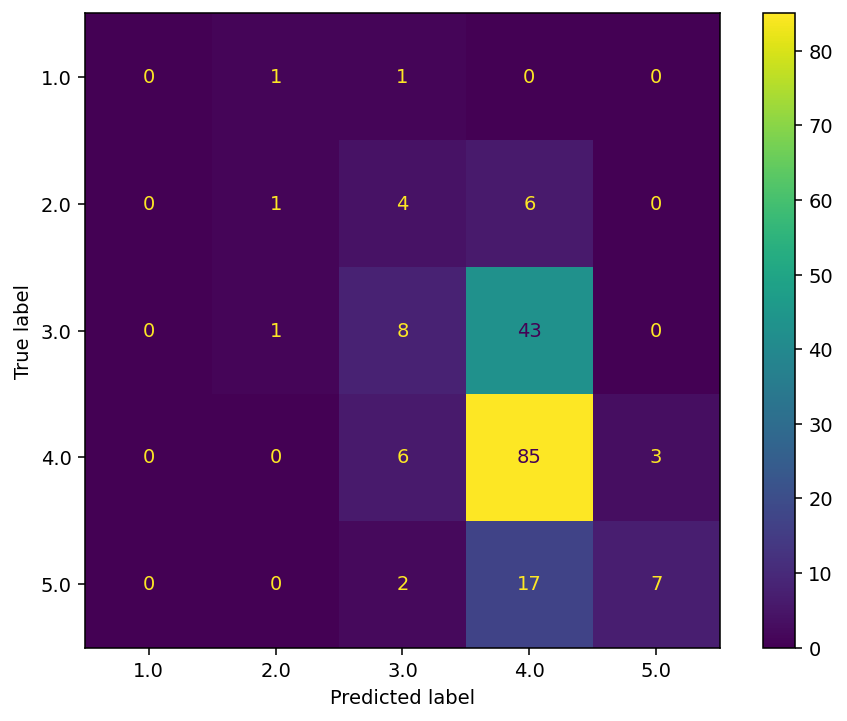

In [86]:
plot_confusion_matrix(estimator=saved_pipline,
                      X = test[all_features],
                      y_true = test[target])
plt.show()

# EOF
___